# Discounted Cash Flow model
Discounted cash flow (DCF) is a valuation method used to estimate the value of an investment based on its expected future cash flows. DCF analysis attempts to figure out the value of an investment today, based on projections of how much money it will generate in the future. This applies to the decisions of investors in companies or securities, such as acquiring a company or buying a stock, and for business owners and managers looking to make capital budgeting or operating expenditures decisions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

COUNTRY = 'Abu Dhabi'
INDUSTRY = 'Air Transport'
INVESTMENT_HORIZON = '5 years'
FIXED_ILLIQUIDITY_PREMIUM = 0.0082
COMPANY_SIZE = 123536000
TAX_RATE = 0.55
EQUITY_WEIGHT = 1
DEBT_WEIGHT = 0
COST_OF_DEBT = 0
GROWTH_RATE = 0.04

The following calculations need to be performed before the discounted cash flow model can be applied:
1. Calculation of the **Free Cash Flows**;
2. Calculation of the **Weighted Average Cost of Capital**;

## Free Cash Flows
Free cash flow (FCF) represents the cash a company generates after accounting for cash outflows to support operations and maintain its capital assets. Unlike earnings or net income, free cash flow is a measure of profitability that excludes the non-cash expenses of the income statement and includes spending on equipment and assets as well as changes in working capital from the balance sheet.

Interest payments are excluded from the generally accepted definition of free cash flow. Investment bankers and analysts who need to evaluate a company’s expected performance with different capital structures will use variations of free cash flow like free cash flow for the firm and free cash flow to equity, which are adjusted for interest payments and borrowings.

#### Free Cash Flow calculations
To determine the Free Cash Flow of a company use the following calculation:

$$ FCF = EBIT - Taxes - D&A - Impairment Charges - CapEx $$

For all of these parameters, an estimate for five years needs to be provided in case a 5 year horizon is used.

In [2]:
time_horizon = 6
start_ebit = 10000
growth_rate = 1.04
ebit = np.repeat(start_ebit, time_horizon) * np.repeat(growth_rate, time_horizon)**np.arange(time_horizon) # Exponentially growing 
taxes = ebit * TAX_RATE
danda = np.repeat(50, time_horizon)
impairment_charges = np.repeat(50, time_horizon)
capex = np.repeat(50, time_horizon)
ebit

array([10000.      , 10400.      , 10816.      , 11248.64    ,
       11698.5856  , 12166.529024])

The NOPAT (net operating profit after tax) can be specified which is defined as

$$ \text{NOPAT} = \text{EBIT} - \text{taxes} $$

In [3]:
nopat = ebit - taxes
nopat

array([4500.       , 4680.       , 4867.2      , 5061.888    ,
       5264.36352  , 5474.9380608])

Furthermore, additional corrections can be made to the FCF computations:

In [4]:
additional_corrections = np.repeat(0, time_horizon)

#### Computed Free Cash Flow

In [5]:
fcf = nopat - danda - impairment_charges - capex - additional_corrections
fcf

array([4350.       , 4530.       , 4717.2      , 4911.888    ,
       5114.36352  , 5324.9380608])

## Weighted Average Cost of Capital
The weighted average cost of capital (WACC) represents a firm's average cost of capital from all sources, including common stock, preferred stock, bonds, and other forms of debt.

The weighted average cost of capital is a common way to determine required rate of return because it expresses, in a single number, the return that both bondholders and shareholders demand in order to provide the company with capital. A firm’s WACC is likely to be higher if its stock is relatively volatile or if its debt is seen as risky because investors will demand greater returns. 

### Weighted Average Cost of Capital calculations
The WACC is calculated by using the following formulas:

$$ \text{WACC} = \text{Cost of Equity} * \text{Equity Weight} + (1 - \text{corporate tax})* \text{cost of debt} * \text{debt weight} $$

$$ \text{Cost of equity} = \text{risk free rate (US)} + (\text{Beta company} * \text{Equity risk premium} + \text{Illiquidity premium} + \text{Size premium}) $$

$$ \text{Equity risk premium} = \text{Country Risk Premium} + \text{Risk Free Rate US} + (\text{Country inflation} - \text{US inflation}) - \text{Risk Free Rate country} $$

#### Equity risk premium
Equity Risk Premium is the difference between returns on equity/individual stock and the risk-free rate of return. The risk-free rate of return can be benchmarked to longer-term government bonds, assuming zero default risk by the government. It is the excess return a stock pays to the holder over and above the risk-free rate for the risk the holder is taking. It is the compensation to the investor for taking a higher level of risk and investing in equity rather than risk-free securities.

In [6]:
risk_premium_country = 0.1
risk_free_rate_us = 0.01
inflation_country = 0.01
inflation_us = 0.02
risk_free_rate_country = 0.01

equity_risk_premium = risk_premium_country \
                        + risk_free_rate_us \
                        + (inflation_country - inflation_us) \
                        - risk_free_rate_country

print(f"Equity risk premium {COUNTRY}: {round(risk_premium_country, 4)}")
print(f"Market risk premium: {round(risk_premium_country + risk_free_rate_us, 4)}")
print(f"{COUNTRY} expected return: {round(risk_premium_country + risk_free_rate_us + (inflation_country - inflation_us), 4)}")
print("-"*10)
print(f"Equity risk premium: {round(equity_risk_premium, 4)}")

Equity risk premium Abu Dhabi: 0.1
Market risk premium: 0.11
Abu Dhabi expected return: 0.1
----------
Equity risk premium: 0.09


#### Cost of Equity
The cost of equity is the return that a company requires to decide if an investment meets capital return requirements. Firms often use it as a capital budgeting threshold for the required rate of return. A firm’s cost of equity represents the compensation that the market demands in exchange for owning the asset and bearing the risk of ownership. The traditional formula for the cost of equity is the dividend capitalization model and the capital asset pricing model (CAPM).

$$ \text{Cost of equity} = \text{risk free rate (US)} + (\text{Beta company} * \text{Equity risk premium} + \text{Illiquidity premium} + \text{Size premium}) $$

In [7]:
beta_company = 0.8
illiquidity_premium = 0.15 + FIXED_ILLIQUIDITY_PREMIUM
size_premium = 0.05

cost_of_equity = risk_free_rate_us \
                    + beta_company*equity_risk_premium \
                    + illiquidity_premium \
                    + size_premium

print(cost_of_equity)

0.2902


#### Weighted Average Cost of Capital
The final step is the calculation of the WACC:

$$ \text{WACC} = \text{Cost of Equity} * \text{Equity Weight} + (1 - \text{corporate tax})* \text{cost of debt} * \text{debt weight} $$

In [8]:
wacc = cost_of_equity*EQUITY_WEIGHT \
        + (1-TAX_RATE)*COST_OF_DEBT*DEBT_WEIGHT
wacc

0.2902

## Discounted Cash Flows
### Present value of Free Cash Flows
The next step is to calculate the present value of the free cash flows computed earlier.

In [9]:
fcf_growth = np.diff(fcf) / fcf[1:]
discount_factors = (1 + wacc)**np.arange(time_horizon)
fcf_present_value = fcf/discount_factors
fcf_present_value = fcf_present_value
fcf_present_value

array([4350.        , 3511.08355294, 2833.80664769, 2287.05886561,
       1845.70990746, 1489.4618112 ])

### Implied Enterprise Value
The implied enterprise value is then calculated using the following method:

$$ \text{EV} = \sum^n_{i=1} \text{DCF}_{i} + \frac{\text{Terminal Value}}{(1 + \text{WACC})^{n+1}} $$

$$ \text{Terminal Value} = \frac{\text{FCF}_n * (1 + \text{Growth Rate})}{\text{WACC} - \text{Growth Rate}} $$

In [10]:
terminal_value = (fcf[-1] * (1+GROWTH_RATE)) / (wacc-GROWTH_RATE)
enterprise_value = sum(fcf_present_value) + terminal_value/((1 + wacc)**(time_horizon+1))
enterprise_value

20036.42182447363

### Equity value
The equity value is calculated based on the enterprise value:

$$ \text{Equity Value} = \text{EV} + \text{Cash equivalents} - \text{Non-Controlling Interests} - \text{Preffered Stock} -  \text{Total Debt} $$

In [11]:
cash_equivalents = 0
non_controlling_interests = 0
preferred_stock = 0
total_debt = 0

equity_value = enterprise_value \
                + cash_equivalents \
                - non_controlling_interests \
                - preferred_stock \
                - total_debt
equity_value

20036.42182447363

## Class implementation

In [12]:
from models import DiscountedCashFlow

dcf = DiscountedCashFlow(fcf, wacc, growth_rate-1)
dcf.enterprise_value

20036.421824473633

## Sensitivity Analysis
Sensitivity analysis is used to determine the impact of changes in the underlying model parameters on the outcome of the analysis. In the discounted cash flow model, the two main parameters are:
1. The **growth rate** which shows the perpetual growth of the free cash flows.
2. The **wacc** which is used for discounting the free cash flows and the terminal value.

### Univariate - Growth rate

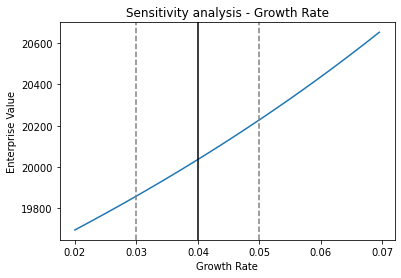

In [13]:
min_growth = 0.02
max_growth = 0.07

growth_rates = np.arange(start=min_growth, stop=max_growth, step=(max_growth-min_growth)/100)
evs = [DiscountedCashFlow(fcf, wacc, g).enterprise_value for g in growth_rates]

plt.plot(growth_rates, evs)
plt.title("Sensitivity analysis - Growth Rate")
plt.xlabel("Growth Rate")
plt.ylabel("Enterprise Value")
plt.axvline(x=GROWTH_RATE, color='k');
plt.axvline(x=GROWTH_RATE - 0.01, color='grey', linestyle='--');
plt.axvline(x=GROWTH_RATE + 0.01, color='grey', linestyle='--');

### Univariate - WACC

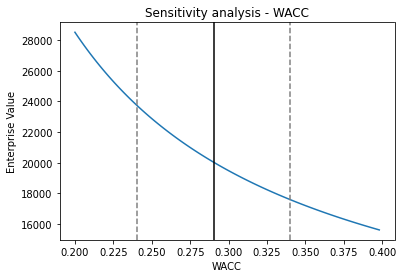

In [17]:
min_wacc = 0.2
max_wacc = 0.4

waccs = np.arange(start=min_wacc, stop=max_wacc, step=(max_wacc-min_wacc)/100)
evs = [DiscountedCashFlow(fcf, w, GROWTH_RATE).enterprise_value for w in waccs]

plt.plot(waccs, evs)
plt.title("Sensitivity analysis - WACC")
plt.xlabel("WACC")
plt.ylabel("Enterprise Value")
plt.axvline(x=wacc, color='k');
plt.axvline(x=wacc - 0.05, color='grey', linestyle='--');
plt.axvline(x=wacc + 0.05, color='grey', linestyle='--');